This does not have a reward for each individual turn. Just plays out d cycles of turns and uses the evaluation function at end.

In [1]:
from utils.game_map_class import GameMap
from utils.game_team_class import GameTeam
from utils.strategy_class import Strategy, RandomStrategy, RuleOfThumbStrategy
from utils.map_setup_functions import setGameBoardRandom, initializeFullRiskMap
from utils.heuristics import BST_Heuristic, EdgeWin

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
import copy

In [4]:
def rollout_lookahead(team,opponent,riskMap,d,discount):
    '''Returns the best action according to lookahead with rollouts'''
    return greedy(team,opponent,riskMap,d,discount)[0]

In [5]:
def greedy(team,opponent,riskMap,d,discount):
    '''Greedily looks through all possible actions and determines the value of each from the current state
    using lookahead with rollouts. Returns action with maximum value and the value itself'''
    possible_destinations = team.getTerritories()
    print(possible_destinations)
    lookahead_list = []
    for dest in possible_destinations:
        action = dest
        u = lookahead(discount,riskMap,action,d,team.name,opponent.name)
        lookahead_list.append((action,u))
    print(lookahead_list)
    if len(lookahead_list) == 0:
        return (None,None)
    return max(lookahead_list, key = lambda x: x[1])

In [6]:
def lookahead(discount,riskMap,action,d,team_name,opponent_name):
    ''' Computes successor states and probabilities of these successor states given the current riskMap
    
    Then for each of these successor states performs a rollout to get a value that that successor state and 
    multiplies it by the probability of that successor state. Takes the sum of those values and multiplies it
    by the discount factor to return the value of that function.
    '''
    # There's only one successor state with 100% likelihood
        
    # Sets up successor state
    sp = copy.deepcopy(riskMap)
    # Doing a deepcopy of the riskMap also makes copies of the GameTeams stored within the map in riskMap.teams
    # so we don't have to make another copy
    my_team = sp.teams[team_name]
    opponent = sp.teams[opponent_name]
    my_team.addTroops(action,1)
    
    sum_successors = 1*rollout(discount,sp,d,my_team,opponent)
        
    return discount*sum_successors

In [7]:
def rollout(discount,sp,d,my_team,opponent):
    '''Rolls out using a stochastic policy (this is encoded in the strategy of my_team itself) against player. 
    Repeats rounds of turns to depth. If my_team wins, the reward is 100. If the opponent wins, the reward is 0.
    Otherwise, at the end of the rollout, we use the BST heuristic for both teams and the reward. We see what percentage
    of BTS between the two teams is attributed to the opponent (would be good for my_team) and use that as the reward'''
    ret = 0
    end_reached = False
    for t in range(d):
        my_team.playAttacks()
        if my_team.hasTeamWon():
            r = 100
            return (discount**t)*r
        opponent.playTurn()
        if opponent.hasTeamWon():
            r = -1
            return (discount**t)*r
        my_team.playAddTroops()
    if my_team.hasTeamWon():
        r = 100
        return (discount**(d-1))*r
    elif opponent.hasTeamWon():
        r = -1
        return (discount**(d-1))*r
    else:
        #print(BST_Heuristic(my_team,sp))
        #BST_my_team_sum = sum(list(BST_Heuristic(my_team,sp).values()))
        #BST_opponent_sum = sum(list(BST_Heuristic(opponent,sp).values()))
        #r = 100*BST_opponent_sum/(BST_my_team_sum+BST_opponent_sum)
        r = 100*EdgeWin(my_team,sp)
        return (discount**(d-1))*r

In [8]:
full_risk_map = initializeFullRiskMap()
team_names = ["rollout_team","rollout_opponent"]
team_strategies = [RandomStrategy,RuleOfThumbStrategy]
risk_map, teams = setGameBoardRandom(team_names, full_risk_map, team_strategies)
teams[1].getPossibleAttacks()

{}

Adding 1 to Congo!
Adding 1 to Western United States!
Adding 1 to Madagascar!
Adding 1 to Madagascar!
Adding 1 to Mongolia!
Adding 1 to Siam!
Adding 1 to Iceland!
('Iceland', ['Greenland', 'Scandinavia'])
('Iceland', 'Greenland')
Team rollout_team declares attack on Team rollout_opponent from Iceland to Greenland
Attacking_dice:  [3]
Defending_dice:  [4]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1
('Congo', ['North Africa', 'South Africa'])
('Congo', 'North Africa')
Team rollout_team declares attack on Team rollout_opponent from Congo to North Africa
Attacking_dice:  [3]
Defending_dice:  [3]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1
('Mongolia', ['Siberia', 'China', 'Kamchatka', 'Japan'])
('Mongolia', 'Japan')
Team rollout_team declares attack on Team rollout_opponent from Mongolia to Japan
Attacking_dice:  [5]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0
('Western United States', ['Ontario', 'Eastern United States']

/Users/janieboettcher/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


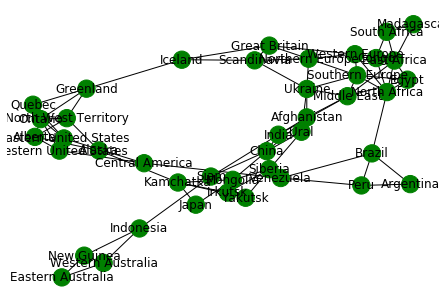

In [9]:
curr_team = teams[0]
defending_team = teams[1]
counter = 0
while len(teams[0].getPossibleAttacks())==0:
    curr_team.playTurn()
    curr_team_temp = curr_team
    curr_team = defending_team
    defending_team = curr_team_temp
    color_map = risk_map.getTeamColorMap()
    nx.draw(risk_map.graph, node_color = color_map, with_labels=True)
    plt.show()
    counter += 1

In [10]:
teams[0].getPossibleAttacks()

{'Madagascar': ['South Africa'], 'Siam': ['China', 'India', 'Indonesia']}

In [11]:
rollout_lookahead(teams[0],teams[1],risk_map,30,.95)

['Western United States', 'Ural', 'Madagascar', 'Middle East', 'Southern Europe', 'Irkutsk', 'Alaska', 'Eastern Australia', 'Yakutsk', 'Egypt', 'Great Britain', 'Brazil', 'North West Territory', 'Iceland', 'Central America', 'Mongolia', 'Venezuela', 'Alberta', 'Congo', 'Siam', 'East Africa', 'Japan']
('Siam', ['China', 'India', 'Indonesia'])
('Siam', 'Indonesia')
Team rollout_team declares attack on Team rollout_opponent from Siam to Indonesia
Attacking_dice:  [5]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0
('Madagascar', ['South Africa'])
('Madagascar', 'South Africa')
Team rollout_team declares attack on Team rollout_opponent from Madagascar to South Africa
Attacking_dice:  [4, 1]
Defending_dice:  [4]
[False]
Attacking Troops Left:  2
Defending Troops Left:  1
Attacking_dice:  [6]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0
('Western United States', ['Ontario', 'Eastern United States'])
Adding 6 to North Africa

Defending Troops Left:  0
('Western United States', 'Central America')
Team rollout_opponent declares attack on Team rollout_team from Western United States to Central America
Attacking_dice:  [6, 4, 3]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  11
Defending Troops Left:  0
Adding 1 to Siam!
Adding 1 to Siam!
Adding 1 to Siam!
('Siam', ['China', 'India', 'Indonesia'])
('Siam', 'India')
Team rollout_team declares attack on Team rollout_opponent from Siam to India
Attacking_dice:  [6, 4, 3]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  4
Defending Troops Left:  0
('India', ['Middle East', 'Afghanistan', 'China'])
Adding 13 to China!
('China', 'Siam')
Team rollout_opponent declares attack on Team rollout_team from China to Siam
Attacking_dice:  [5, 3, 2]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  14
Defending Troops Left:  0
('Siam', 'India')
Team rollout_opponent declares attack on Team rollout_team from Siam to India
Attacking_dice:  [4, 3, 1]
Defending_dice: 

Attacking_dice:  [6, 3, 1]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  16
Defending Troops Left:  0
('East Africa', 'South Africa')
Team rollout_opponent declares attack on Team rollout_team from East Africa to South Africa
Attacking_dice:  [6, 5, 3]
Defending_dice:  [3, 1]
[ True  True]
Attacking Troops Left:  15
Defending Troops Left:  0
('South Africa', 'Madagascar')
Team rollout_opponent declares attack on Team rollout_team from South Africa to Madagascar
Attacking_dice:  [5, 4, 1]
Defending_dice:  [4, 3]
[ True  True]
Attacking Troops Left:  14
Defending Troops Left:  1
Attacking_dice:  [5, 4, 2]
Defending_dice:  [5]
[False]
Attacking Troops Left:  13
Defending Troops Left:  1
Attacking_dice:  [6, 3, 1]
Defending_dice:  [5]
[ True]
Attacking Troops Left:  13
Defending Troops Left:  0
Adding 1 to Egypt!
Adding 1 to Egypt!
Adding 1 to Siam!
('Egypt', ['Southern Europe', 'Middle East', 'East Africa', 'North Africa'])
('Egypt', 'East Africa')
Team rollout_team declares attack

Defending_dice:  [1]
[ True]
Attacking Troops Left:  3
Defending Troops Left:  0
('Greenland', ['North West Territory', 'Ontario', 'Quebec'])
Adding 9 to Scandinavia!
('Scandinavia', 'Great Britain')
Team rollout_opponent declares attack on Team rollout_team from Scandinavia to Great Britain
Attacking_dice:  [5, 2, 1]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  10
Defending Troops Left:  0
('Great Britain', 'Iceland')
Team rollout_opponent declares attack on Team rollout_team from Great Britain to Iceland
Attacking_dice:  [4, 2, 1]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  9
Defending Troops Left:  0
('Iceland', 'Greenland')
Team rollout_opponent declares attack on Team rollout_team from Iceland to Greenland
Attacking_dice:  [6, 2, 1]
Defending_dice:  [6, 3]
[False False]
Attacking Troops Left:  6
Defending Troops Left:  2
Attacking_dice:  [5, 4, 2]
Defending_dice:  [6, 1]
[False  True]
Attacking Troops Left:  5
Defending Troops Left:  1
Attacking_dice:  [6, 4, 2]
D

('Eastern Australia', ['New Guinea', 'Western Australia'])
('Eastern Australia', 'Western Australia')
Team rollout_team declares attack on Team rollout_opponent from Eastern Australia to Western Australia
Attacking_dice:  [6]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0
('Middle East', ['Southern Europe', 'Ukraine', 'Egypt', 'Afghanistan', 'India'])
('Middle East', 'Egypt')
Team rollout_team declares attack on Team rollout_opponent from Middle East to Egypt
Attacking_dice:  [5, 3]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  3
Defending Troops Left:  0
('Egypt', ['Southern Europe', 'North Africa'])
Adding 8 to Southern Europe!
('Southern Europe', 'Middle East')
Team rollout_opponent declares attack on Team rollout_team from Southern Europe to Middle East
Attacking_dice:  [5, 4, 3]
Defending_dice:  [5]
[False]
Attacking Troops Left:  12
Defending Troops Left:  1
Attacking_dice:  [6, 5, 3]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  12

('Ukraine', 'Southern Europe')
Team rollout_opponent declares attack on Team rollout_team from Ukraine to Southern Europe
Attacking_dice:  [4, 2, 1]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  7
Defending Troops Left:  0
('Southern Europe', 'North Africa')
Team rollout_opponent declares attack on Team rollout_team from Southern Europe to North Africa
Attacking_dice:  [6, 5, 3]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  6
Defending Troops Left:  0
('North Africa', 'East Africa')
Team rollout_opponent declares attack on Team rollout_team from North Africa to East Africa
Attacking_dice:  [5, 4, 2]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  5
Defending Troops Left:  0
('East Africa', 'Middle East')
Team rollout_opponent declares attack on Team rollout_team from East Africa to Middle East
Attacking_dice:  [4, 3, 1]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  4
Defending Troops Left:  0
('Middle East', 'Egypt')
Team rollout_opponent declares attack on Te

Attacking_dice:  [3, 1]
Defending_dice:  [6]
[False]
Attacking Troops Left:  2
Defending Troops Left:  1
Attacking_dice:  [3]
Defending_dice:  [4]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1
Adding 1 to Japan!
Adding 1 to North West Territory!
Adding 1 to Great Britain!
Adding 1 to Japan!
Adding 1 to Western United States!
Adding 1 to Madagascar!
('North West Territory', ['Greenland'])
('North West Territory', 'Greenland')
Team rollout_team declares attack on Team rollout_opponent from North West Territory to Greenland
Attacking_dice:  [4]
Defending_dice:  [6]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1
('Iceland', ['Greenland', 'Scandinavia'])
('Iceland', 'Scandinavia')
Team rollout_team declares attack on Team rollout_opponent from Iceland to Scandinavia
Attacking_dice:  [1]
Defending_dice:  [1]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1
('Great Britain', ['Scandinavia', 'Northern Europe', 'Western Europe'])
('Great Britain', 'Northern

Defending Troops Left:  1
Attacking_dice:  [6, 4, 3]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  9
Defending Troops Left:  0
('Greenland', 'Iceland')
Team rollout_opponent declares attack on Team rollout_team from Greenland to Iceland
Attacking_dice:  [6, 4, 2]
Defending_dice:  [6, 1]
[False  True]
Attacking Troops Left:  7
Defending Troops Left:  1
Attacking_dice:  [5, 3, 1]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  7
Defending Troops Left:  0
Adding 1 to Madagascar!
Adding 1 to Madagascar!
Adding 1 to Madagascar!
('Madagascar', ['East Africa', 'South Africa'])
('Madagascar', 'South Africa')
Team rollout_team declares attack on Team rollout_opponent from Madagascar to South Africa
Attacking_dice:  [6, 4, 3]
Defending_dice:  [6]
[False]
Attacking Troops Left:  3
Defending Troops Left:  1
Attacking_dice:  [6, 1]
Defending_dice:  [6]
[False]
Attacking Troops Left:  2
Defending Troops Left:  1
Attacking_dice:  [5]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  2


[ True]
Attacking Troops Left:  3
Defending Troops Left:  0
('Indonesia', ['Siam'])
('Indonesia', 'Siam')
Team rollout_team declares attack on Team rollout_opponent from Indonesia to Siam
Attacking_dice:  [5]
Defending_dice:  [4, 2]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  4
Attacking_dice:  [4]
Defending_dice:  [6, 2]
[False]
Attacking Troops Left:  1
Defending Troops Left:  4
('Quebec', ['Ontario', 'Greenland', 'Eastern United States'])
('Quebec', 'Ontario')
Team rollout_team declares attack on Team rollout_opponent from Quebec to Ontario
Attacking_dice:  [4]
Defending_dice:  [5]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1
('Ural', ['Afghanistan', 'Siberia', 'China'])
Adding 11 to Siam!
('Siam', 'Indonesia')
Team rollout_opponent declares attack on Team rollout_team from Siam to Indonesia
Attacking_dice:  [4, 3, 1]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  15
Defending Troops Left:  0
('Indonesia', 'New Guinea')
Team rollout_opponent declar

Defending Troops Left:  0
Adding 1 to Western Australia!
Adding 1 to Congo!
Adding 1 to Quebec!
('Congo', ['East Africa', 'South Africa'])
('Congo', 'South Africa')
Team rollout_team declares attack on Team rollout_opponent from Congo to South Africa
Attacking_dice:  [4]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0
('North Africa', ['Brazil', 'Western Europe', 'Southern Europe', 'Egypt', 'East Africa'])
('North Africa', 'East Africa')
Team rollout_team declares attack on Team rollout_opponent from North Africa to East Africa
Attacking_dice:  [3]
Defending_dice:  [4]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1
('Quebec', ['Ontario', 'Greenland', 'Eastern United States'])
Adding 10 to East Africa!
('East Africa', 'North Africa')
Team rollout_opponent declares attack on Team rollout_team from East Africa to North Africa
Attacking_dice:  [4, 3, 2]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  11
Defending Troops Left:  0
('North Af

Attacking Troops Left:  1
Defending Troops Left:  1
('Southern Europe', ['Western Europe', 'Northern Europe', 'Ukraine', 'Egypt', 'North Africa'])
('Southern Europe', 'Egypt')
Team rollout_team declares attack on Team rollout_opponent from Southern Europe to Egypt
Attacking_dice:  [3]
Defending_dice:  [3]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1
('Middle East', ['Ukraine', 'Egypt', 'East Africa', 'Afghanistan', 'India'])
Adding 8 to China!
('China', 'Siberia')
Team rollout_opponent declares attack on Team rollout_team from China to Siberia
Attacking_dice:  [5, 4, 2]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  9
Defending Troops Left:  0
('Siberia', 'Mongolia')
Team rollout_opponent declares attack on Team rollout_team from Siberia to Mongolia
Attacking_dice:  [5, 3, 2]
Defending_dice:  [5]
[False]
Attacking Troops Left:  7
Defending Troops Left:  1
Attacking_dice:  [6, 2, 1]
Defending_dice:  [5]
[ True]
Attacking Troops Left:  7
Defending Troops Left:  0
('M

('India', 'China')
Team rollout_team declares attack on Team rollout_opponent from India to China
Attacking_dice:  [6]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0
('North West Territory', ['Greenland'])
('North West Territory', 'Greenland')
Team rollout_team declares attack on Team rollout_opponent from North West Territory to Greenland
Attacking_dice:  [6, 1]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  3
Defending Troops Left:  0
('Siam', ['Indonesia'])
('Siam', 'Indonesia')
Team rollout_team declares attack on Team rollout_opponent from Siam to Indonesia
Attacking_dice:  [2]
Defending_dice:  [2]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1
('Alaska', ['Kamchatka'])
Adding 5 to Afghanistan!
('Afghanistan', 'China')
Team rollout_opponent declares attack on Team rollout_team from Afghanistan to China
Attacking_dice:  [6, 4, 3]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  6
Defending Troops Left:  0
('China', 'India')
T

Defending_dice:  [1]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0
('Congo', ['North Africa'])
('Congo', 'North Africa')
Team rollout_team declares attack on Team rollout_opponent from Congo to North Africa
Attacking_dice:  [6, 5, 3]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  5
Defending Troops Left:  0
('North Africa', ['Western Europe', 'Southern Europe', 'Egypt'])
Adding 7 to Egypt!
('Egypt', 'East Africa')
Team rollout_opponent declares attack on Team rollout_team from Egypt to East Africa
Attacking_dice:  [6, 5, 4]
Defending_dice:  [6]
[False]
Attacking Troops Left:  7
Defending Troops Left:  1
Attacking_dice:  [6, 5, 1]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  7
Defending Troops Left:  0
('East Africa', 'Congo')
Team rollout_opponent declares attack on Team rollout_team from East Africa to Congo
Attacking_dice:  [5, 3, 1]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  6
Defending Troops Left:  0
('Congo', 'South Africa')
Team rollout_oppo

Defending Troops Left:  1
Attacking_dice:  [6, 2, 1]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  13
Defending Troops Left:  0
('Ontario', 'North West Territory')
Team rollout_opponent declares attack on Team rollout_team from Ontario to North West Territory
Attacking_dice:  [5, 4, 2]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  12
Defending Troops Left:  0
('North West Territory', 'Greenland')
Team rollout_opponent declares attack on Team rollout_team from North West Territory to Greenland
Attacking_dice:  [4, 3, 2]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  11
Defending Troops Left:  0
('Greenland', 'Iceland')
Team rollout_opponent declares attack on Team rollout_team from Greenland to Iceland
Attacking_dice:  [6, 4, 2]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  10
Defending Troops Left:  0
('Iceland', 'Great Britain')
Team rollout_opponent declares attack on Team rollout_team from Iceland to Great Britain
Attacking_dice:  [5, 4, 2]
Defending_dice:

Defending_dice:  [3]
[ True]
Attacking Troops Left:  3
Defending Troops Left:  0
('Eastern Australia', ['New Guinea', 'Western Australia'])
Adding 11 to Western Australia!
('Western Australia', 'Eastern Australia')
Team rollout_opponent declares attack on Team rollout_team from Western Australia to Eastern Australia
Attacking_dice:  [3, 2, 1]
Defending_dice:  [6, 3]
[False False]
Attacking Troops Left:  10
Defending Troops Left:  2
Attacking_dice:  [6, 5, 3]
Defending_dice:  [5, 3]
[ True  True]
Attacking Troops Left:  10
Defending Troops Left:  0
Adding 1 to Siam!
Adding 1 to Greenland!
Adding 1 to Ontario!
('Siam', ['India'])
('Siam', 'India')
Team rollout_team declares attack on Team rollout_opponent from Siam to India
Attacking_dice:  [1]
Defending_dice:  [6]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1
('Ontario', ['North West Territory', 'Alberta', 'Quebec', 'Western United States', 'Eastern United States'])
('Ontario', 'Eastern United States')
Team rollout_team de

Attacking_dice:  [4, 2]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  3
Defending Troops Left:  0
('Southern Europe', ['Western Europe', 'Northern Europe', 'Ukraine', 'Egypt', 'North Africa'])
('Southern Europe', 'North Africa')
Team rollout_team declares attack on Team rollout_opponent from Southern Europe to North Africa
Attacking_dice:  [6]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0
('New Guinea', ['Indonesia'])
Adding 11 to Egypt!
('Egypt', 'Middle East')
Team rollout_opponent declares attack on Team rollout_team from Egypt to Middle East
Attacking_dice:  [6, 3, 2]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  12
Defending Troops Left:  0
('Middle East', 'Southern Europe')
Team rollout_opponent declares attack on Team rollout_team from Middle East to Southern Europe
Attacking_dice:  [4, 3, 1]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  11
Defending Troops Left:  0
('Southern Europe', 'North Africa')
Team rollout_opponent 

('Irkutsk', ['Kamchatka', 'Mongolia'])
('Irkutsk', 'Kamchatka')
Team rollout_team declares attack on Team rollout_opponent from Irkutsk to Kamchatka
Attacking_dice:  [3]
Defending_dice:  [4]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1
('East Africa', ['Egypt', 'North Africa', 'Middle East', 'Congo'])
('East Africa', 'North Africa')
Team rollout_team declares attack on Team rollout_opponent from East Africa to North Africa
Attacking_dice:  [6, 1]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  3
Defending Troops Left:  0
('Great Britain', ['Scandinavia', 'Northern Europe', 'Western Europe'])
('Great Britain', 'Scandinavia')
Team rollout_team declares attack on Team rollout_opponent from Great Britain to Scandinavia
Attacking_dice:  [5]
Defending_dice:  [5]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1
('Eastern United States', ['Ontario', 'Quebec'])
('Eastern United States', 'Ontario')
Team rollout_team declares attack on Team rollout_opponent from Eas

Adding 1 to Western Australia!
Adding 1 to Eastern Australia!
Adding 1 to Western Australia!
('Western Australia', ['Indonesia', 'New Guinea'])
('Western Australia', 'New Guinea')
Team rollout_team declares attack on Team rollout_opponent from Western Australia to New Guinea
Attacking_dice:  [6, 5, 1]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  7
Defending Troops Left:  0
('New Guinea', ['Indonesia'])
('New Guinea', 'Indonesia')
Team rollout_team declares attack on Team rollout_opponent from New Guinea to Indonesia
Attacking_dice:  [4, 3, 2]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  6
Defending Troops Left:  0
('Indonesia', ['Siam'])
Adding 12 to Siam!
('Siam', 'Indonesia')
Team rollout_opponent declares attack on Team rollout_team from Siam to Indonesia
Attacking_dice:  [5, 3, 1]
Defending_dice:  [5, 4]
[False False]
Attacking Troops Left:  11
Defending Troops Left:  5
Attacking_dice:  [5, 2, 1]
Defending_dice:  [4, 2]
[ True False]
Attacking Troops Left:  10
Defen

Adding 10 to Afghanistan!
('Afghanistan', 'China')
Team rollout_opponent declares attack on Team rollout_team from Afghanistan to China
Attacking_dice:  [4, 2, 1]
Defending_dice:  [5]
[False]
Attacking Troops Left:  10
Defending Troops Left:  1
Attacking_dice:  [3, 2, 1]
Defending_dice:  [6]
[False]
Attacking Troops Left:  9
Defending Troops Left:  1
Attacking_dice:  [5, 3, 1]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  9
Defending Troops Left:  0
('China', 'India')
Team rollout_opponent declares attack on Team rollout_team from China to India
Attacking_dice:  [6, 5, 1]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  8
Defending Troops Left:  0
('India', 'Siam')
Team rollout_opponent declares attack on Team rollout_team from India to Siam
Attacking_dice:  [6, 5, 3]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  7
Defending Troops Left:  0
('Siam', 'Indonesia')
Team rollout_opponent declares attack on Team rollout_team from Siam to Indonesia
Attacking_dice:  [4, 3, 1

('Afghanistan', 'China')
Team rollout_opponent declares attack on Team rollout_team from Afghanistan to China
Attacking_dice:  [6, 5, 1]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  9
Defending Troops Left:  0
('China', 'Mongolia')
Team rollout_opponent declares attack on Team rollout_team from China to Mongolia
Attacking_dice:  [6, 4, 3]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  8
Defending Troops Left:  0
('Mongolia', 'Kamchatka')
Team rollout_opponent declares attack on Team rollout_team from Mongolia to Kamchatka
Attacking_dice:  [6, 4, 3]
Defending_dice:  [5]
[ True]
Attacking Troops Left:  7
Defending Troops Left:  0
('Kamchatka', 'Alaska')
Team rollout_opponent declares attack on Team rollout_team from Kamchatka to Alaska
Attacking_dice:  [5, 3, 1]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  6
Defending Troops Left:  0
Adding 1 to Ukraine!
Adding 1 to Ural!
Adding 1 to Eastern Australia!
Adding 1 to Iceland!
('Iceland', ['Greenland'])
('Iceland', 'Gre

('Irkutsk', ['Kamchatka'])
('Irkutsk', 'Kamchatka')
Team rollout_team declares attack on Team rollout_opponent from Irkutsk to Kamchatka
Attacking_dice:  [6]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0
('Iceland', ['Scandinavia'])
Adding 6 to Ontario!
('Ontario', 'Alberta')
Team rollout_opponent declares attack on Team rollout_team from Ontario to Alberta
Attacking_dice:  [6, 3, 2]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  7
Defending Troops Left:  0
('Alberta', 'North West Territory')
Team rollout_opponent declares attack on Team rollout_team from Alberta to North West Territory
Attacking_dice:  [4, 2, 1]
Defending_dice:  [5]
[False]
Attacking Troops Left:  5
Defending Troops Left:  1
Attacking_dice:  [6, 3, 2]
Defending_dice:  [5]
[ True]
Attacking Troops Left:  5
Defending Troops Left:  0
('North West Territory', 'Greenland')
Team rollout_opponent declares attack on Team rollout_team from North West Territory to Greenland
Attacking_dic

Adding 11 to China!
('China', 'Siberia')
Team rollout_opponent declares attack on Team rollout_team from China to Siberia
Attacking_dice:  [6, 3, 2]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  12
Defending Troops Left:  0
('Siberia', 'Mongolia')
Team rollout_opponent declares attack on Team rollout_team from Siberia to Mongolia
Attacking_dice:  [5, 4, 2]
Defending_dice:  [6]
[False]
Attacking Troops Left:  10
Defending Troops Left:  1
Attacking_dice:  [6, 5, 4]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  10
Defending Troops Left:  0
('Mongolia', 'Kamchatka')
Team rollout_opponent declares attack on Team rollout_team from Mongolia to Kamchatka
Attacking_dice:  [4, 3, 1]
Defending_dice:  [4]
[False]
Attacking Troops Left:  8
Defending Troops Left:  1
Attacking_dice:  [6, 5, 4]
Defending_dice:  [5]
[ True]
Attacking Troops Left:  8
Defending Troops Left:  0
('Kamchatka', 'Alaska')
Team rollout_opponent declares attack on Team rollout_team from Kamchatka to Alaska
Attacki

('North Africa', 'Congo')
Team rollout_opponent declares attack on Team rollout_team from North Africa to Congo
Attacking_dice:  [5, 4, 3]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  8
Defending Troops Left:  0
('Congo', 'South Africa')
Team rollout_opponent declares attack on Team rollout_team from Congo to South Africa
Attacking_dice:  [6, 2, 1]
Defending_dice:  [5, 2]
[ True False]
Attacking Troops Left:  6
Defending Troops Left:  1
Attacking_dice:  [6, 4, 1]
Defending_dice:  [5]
[ True]
Attacking Troops Left:  6
Defending Troops Left:  0
Adding 1 to Iceland!
Adding 1 to Siam!
Adding 1 to Iceland!
Adding 1 to Peru!
Adding 1 to Egypt!
Adding 1 to Great Britain!
('Iceland', ['Greenland', 'Scandinavia'])
('Iceland', 'Greenland')
Team rollout_team declares attack on Team rollout_opponent from Iceland to Greenland
Attacking_dice:  [4, 2]
Defending_dice:  [6]
[False]
Attacking Troops Left:  2
Defending Troops Left:  1
Attacking_dice:  [2]
Defending_dice:  [4]
[False]
Attacking Tr

('Ural', ['Afghanistan', 'Siberia', 'China'])
('Ural', 'China')
Team rollout_team declares attack on Team rollout_opponent from Ural to China
Attacking_dice:  [5]
Defending_dice:  [6]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1
('Venezuela', ['Central America'])
Adding 11 to Afghanistan!
('Afghanistan', 'Ukraine')
Team rollout_opponent declares attack on Team rollout_team from Afghanistan to Ukraine
Attacking_dice:  [6, 4, 1]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  12
Defending Troops Left:  0
('Ukraine', 'Scandinavia')
Team rollout_opponent declares attack on Team rollout_team from Ukraine to Scandinavia
Attacking_dice:  [6, 5, 2]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  11
Defending Troops Left:  0
('Scandinavia', 'Iceland')
Team rollout_opponent declares attack on Team rollout_team from Scandinavia to Iceland
Attacking_dice:  [6, 3, 1]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  10
Defending Troops Left:  0
Adding 1 to Brazil!
Adding

Attacking Troops Left:  1
Defending Troops Left:  1
('Ontario', ['Greenland', 'Quebec', 'Eastern United States'])
('Ontario', 'Greenland')
Team rollout_team declares attack on Team rollout_opponent from Ontario to Greenland
Attacking_dice:  [5]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0
('Irkutsk', ['Siberia', 'Yakutsk', 'Kamchatka', 'Mongolia'])
('Irkutsk', 'Kamchatka')
Team rollout_team declares attack on Team rollout_opponent from Irkutsk to Kamchatka
Attacking_dice:  [6, 4]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  3
Defending Troops Left:  0
('Iceland', ['Scandinavia'])
('Iceland', 'Scandinavia')
Team rollout_team declares attack on Team rollout_opponent from Iceland to Scandinavia
Attacking_dice:  [1]
Defending_dice:  [2]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1
('Western United States', ['Eastern United States'])
Adding 7 to Japan!
('Japan', 'Kamchatka')
Team rollout_opponent declares attack on Team rollout_team

('Great Britain', ['Scandinavia', 'Northern Europe', 'Western Europe'])
('Great Britain', 'Western Europe')
Team rollout_team declares attack on Team rollout_opponent from Great Britain to Western Europe
Attacking_dice:  [6, 4]
Defending_dice:  [6]
[False]
Attacking Troops Left:  2
Defending Troops Left:  1
Attacking_dice:  [5]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0
('Western United States', ['Alberta', 'Ontario', 'Eastern United States', 'Central America'])
Adding 12 to Northern Europe!
('Northern Europe', 'Great Britain')
Team rollout_opponent declares attack on Team rollout_team from Northern Europe to Great Britain
Attacking_dice:  [5, 3, 2]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  18
Defending Troops Left:  0
('Great Britain', 'Iceland')
Team rollout_opponent declares attack on Team rollout_team from Great Britain to Iceland
Attacking_dice:  [5, 4, 3]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  17
Defending Troops Left

('Siam', ['China', 'India', 'Indonesia'])
('Siam', 'India')
Team rollout_team declares attack on Team rollout_opponent from Siam to India
Attacking_dice:  [6, 1]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  3
Defending Troops Left:  0
('Madagascar', ['South Africa'])
('Madagascar', 'South Africa')
Team rollout_team declares attack on Team rollout_opponent from Madagascar to South Africa
Attacking_dice:  [6, 4]
Defending_dice:  [6]
[False]
Attacking Troops Left:  2
Defending Troops Left:  1
Attacking_dice:  [1]
Defending_dice:  [6]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1
('India', ['Afghanistan', 'China'])
Adding 6 to North Africa!
('North Africa', 'Egypt')
Team rollout_opponent declares attack on Team rollout_team from North Africa to Egypt
Attacking_dice:  [3, 2, 1]
Defending_dice:  [3]
[False]
Attacking Troops Left:  6
Defending Troops Left:  1
Attacking_dice:  [5, 4, 3]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  6
Defending Troops Left:  0
('Egy

[ True]
Attacking Troops Left:  12
Defending Troops Left:  0
('Alberta', 'Ontario')
Team rollout_opponent declares attack on Team rollout_team from Alberta to Ontario
Attacking_dice:  [6, 4, 1]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  11
Defending Troops Left:  0
Adding 1 to Alaska!
Adding 1 to Eastern Australia!
Adding 1 to Eastern Australia!
('Siam', ['China', 'India'])
('Siam', 'China')
Team rollout_team declares attack on Team rollout_opponent from Siam to China
Attacking_dice:  [1]
Defending_dice:  [1]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1
('Alaska', ['North West Territory', 'Alberta', 'Kamchatka'])
('Alaska', 'Kamchatka')
Team rollout_team declares attack on Team rollout_opponent from Alaska to Kamchatka
Attacking_dice:  [3]
Defending_dice:  [5]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1
('Eastern Australia', ['New Guinea', 'Western Australia'])
Adding 12 to Western Australia!
('Western Australia', 'Indonesia')
Team rollout_oppon

Attacking_dice:  [4]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0
('Northern Europe', ['Western Europe', 'Scandinavia', 'Southern Europe', 'Ukraine'])
('Northern Europe', 'Scandinavia')
Team rollout_team declares attack on Team rollout_opponent from Northern Europe to Scandinavia
Attacking_dice:  [2]
Defending_dice:  [6]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1
('Brazil', ['North Africa'])
Adding 9 to East Africa!
('East Africa', 'Congo')
Team rollout_opponent declares attack on Team rollout_team from East Africa to Congo
Attacking_dice:  [6, 4, 3]
Defending_dice:  [6]
[False]
Attacking Troops Left:  9
Defending Troops Left:  1
Attacking_dice:  [4, 2, 1]
Defending_dice:  [4]
[False]
Attacking Troops Left:  8
Defending Troops Left:  1
Attacking_dice:  [6, 5, 4]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  8
Defending Troops Left:  0
('Congo', 'South Africa')
Team rollout_opponent declares attack on Team rollout_team from Con

'Egypt'

In [ ]:
a = {1:2,2:3}
a.values()